In [2]:
library("lme4")
library("emmeans")
library("lmerTest")

Loading required package: Matrix

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




## NAT8A ALPHA

In [21]:
crossmtf <- read.csv("../output/pairwise-nat8a-alpha-unified.csv")
crossmtf$GB_to <- factor(crossmtf$GB_to, levels=c('CB','C','N'))
crossmodel <- lmer(dist ~ same_CI*GB_to + (1|from_m), data=crossmtf)
summary(crossmodel, ddf=c("Kenward-Roger"))

Linear mixed model fit by REML. t-tests use Kenward-Roger's method [
lmerModLmerTest]
Formula: dist ~ same_CI * GB_to + (1 | from_m)
   Data: crossmtf

REML criterion at convergence: 124

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.02356 -0.65660 -0.04543  0.58643  2.88621 

Random effects:
 Groups   Name        Variance Std.Dev.
 from_m   (Intercept) 0.002677 0.05174 
 Residual             0.065729 0.25638 
Number of obs: 768, groups:  from_m, 8

Fixed effects:
                    Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          0.81826    0.02467  14.65181  33.172 3.40e-15 ***
same_CITrue         -0.56293    0.06620 755.00000  -8.504  < 2e-16 ***
GB_toC               0.85911    0.02340 755.00000  36.708  < 2e-16 ***
GB_toN               0.28194    0.02340 755.00000  12.047  < 2e-16 ***
same_CITrue:GB_toC   0.39084    0.09362 755.00000   4.175 3.33e-05 ***
same_CITrue:GB_toN   0.41787    0.09362 755.00000   4.464 9.29e-06 ***
---
Signif. 

In [22]:
joint_tests(crossmodel)

,model term,df1,df2,F.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,same_CI,1,755,58.920,5.084875e-14
3,GB_to,2,755,254.179,3.968885e-85
2,same_CI:GB_to,2,755,12.479,4.655525e-06


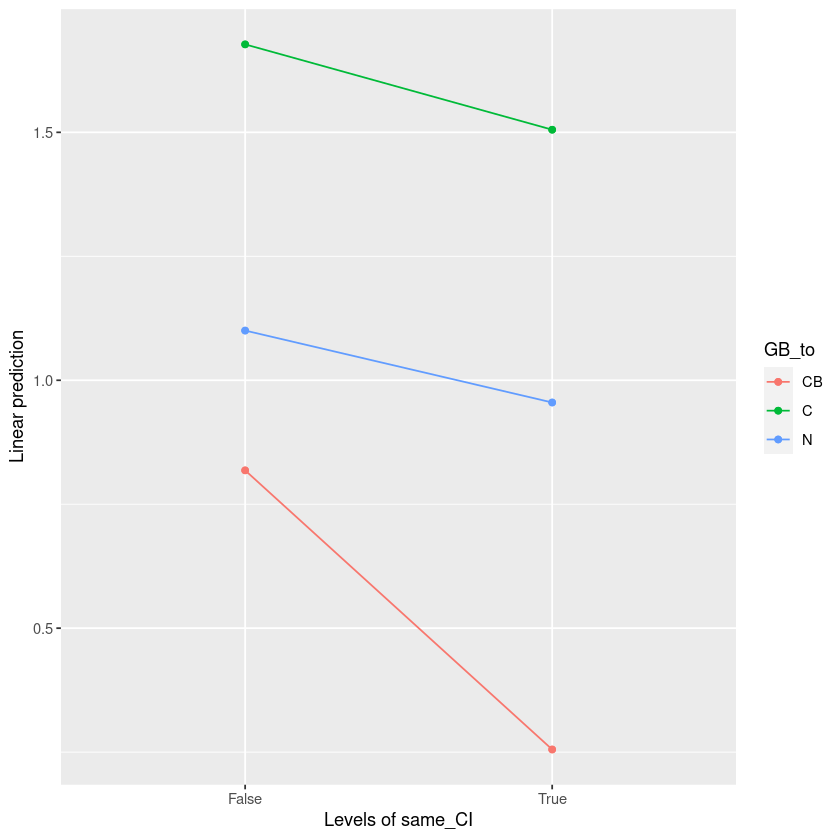

In [23]:
emmip(crossmodel, GB_to ~ same_CI)

In [24]:
EMM1 <- emmeans(crossmodel, ~ same_CI|GB_to)
crossmodelsum <- EMM1 |> test()
crossmodelsum

,same_CI,GB_to,emmean,SE,df,t.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,False,CB,0.8182644,0.02466710,14.65181,33.172297,3.397267e-15
2,True,CB,0.2553338,0.06665316,423.06682,3.830784,1.470871e-04
3,False,C,1.6773700,0.02466710,14.65181,68.000289,9.856952e-20
4,True,C,1.5052818,0.06665316,423.06682,22.583804,1.131089e-74
5,False,N,1.1002045,0.02466710,14.65181,44.602098,4.621857e-17
6,True,N,0.9551390,0.06665316,423.06682,14.329989,3.018772e-38


## NAT8B

In [14]:
crossmtf <- read.csv("../output/pairwise-nat8b-unified.csv")
crossmtf$GB_to <- factor(crossmtf$GB_to, levels=c('CB', 'C'))
crossmodel <- lmer(dist ~ same_CI*GB_to + (1|from_m), data=crossmtf)
summary(crossmodel, ddf=c("Kenward-Roger"))

Linear mixed model fit by REML. t-tests use Kenward-Roger's method [
lmerModLmerTest]
Formula: dist ~ same_CI * GB_to + (1 | from_m)
   Data: crossmtf

REML criterion at convergence: 418.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1588 -0.7576 -0.1571  0.7446  2.7272 

Random effects:
 Groups   Name        Variance Std.Dev.
 from_m   (Intercept) 0.01099  0.1048  
 Residual             0.12592  0.3549  
Number of obs: 512, groups:  from_m, 8

Fixed effects:
                    Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          1.21377    0.04357   9.61254  27.857 1.62e-10 ***
same_CITrue         -0.54635    0.09162 501.00000  -5.963 4.68e-09 ***
GB_toC               0.28238    0.03239 501.00000   8.717  < 2e-16 ***
same_CITrue:GB_toC   0.20536    0.12957 501.00000   1.585    0.114    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) sm_CIT GB_toC
same_CITrue -0.131             

In [15]:
joint_tests(crossmodel)

,model term,df1,df2,F.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,same_CI,1,501,46.897,2.198392e-11
3,GB_to,1,501,35.324,5.234981e-09
2,same_CI:GB_to,1,501,2.512,1.136326e-01


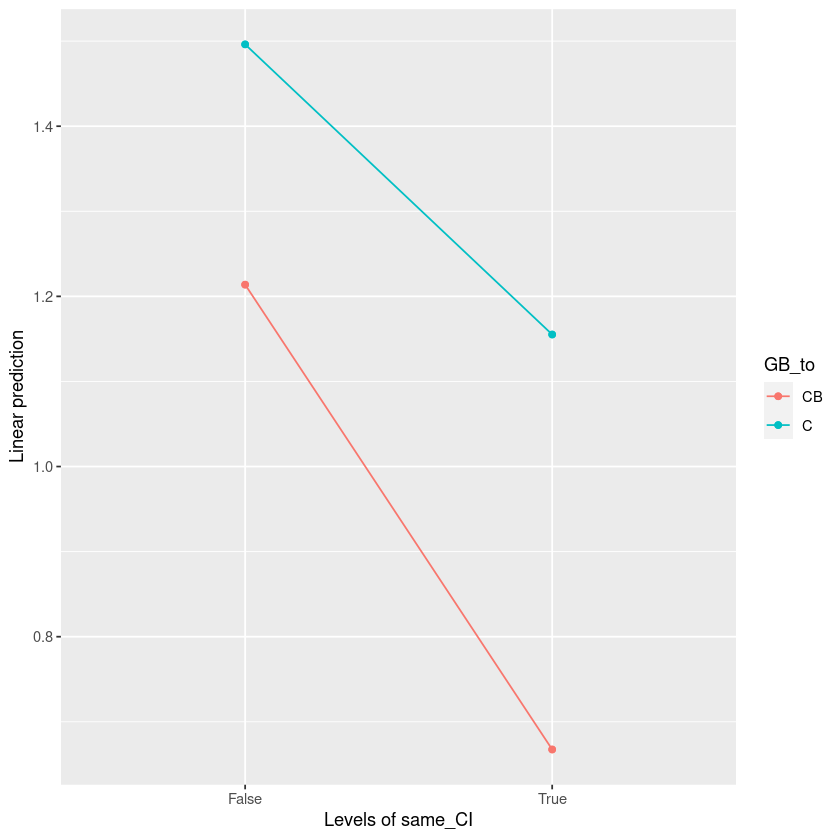

In [16]:
emmip(crossmodel, GB_to ~ same_CI)

In [17]:
EMM1 <- emmeans(crossmodel, ~ same_CI|GB_to)
crossmodelsum <- EMM1 |> test()
crossmodelsum

GB_to = CB:
 same_CI emmean     SE     df lower.CL upper.CL
 False    1.214 0.0436   9.61    1.116    1.311
 True     0.667 0.0961 174.10    0.478    0.857

GB_to = C:
 same_CI emmean     SE     df lower.CL upper.CL
 False    1.496 0.0436   9.61    1.399    1.594
 True     1.155 0.0961 174.10    0.965    1.345

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

In [19]:
# write.csv(crossmodelsum, "../output/pairwise-nat8b-unified-Rmods.csv")

## SYNTH8B

In [3]:
crossmtf <- read.csv("../output/pairwise-synth8b-unified.csv")
crossmtf$GB_to <- factor(crossmtf$GB_to, levels=c('CB', 'C'))
crossmodel <- lmer(dist ~ same_CI*GB_to + (1|from_m), data=crossmtf)
summary(crossmodel, ddf=c("Kenward-Roger"))

Linear mixed model fit by REML. t-tests use Kenward-Roger's method [
lmerModLmerTest]
Formula: dist ~ same_CI * GB_to + (1 | from_m)
   Data: crossmtf

REML criterion at convergence: 499.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2624 -0.7333 -0.1074  0.5947  3.0919 

Random effects:
 Groups   Name        Variance Std.Dev.
 from_m   (Intercept) 0.007043 0.08392 
 Residual             0.148641 0.38554 
Number of obs: 512, groups:  from_m, 8

Fixed effects:
                    Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          1.52288    0.03873  11.47477  39.324 1.34e-13 ***
same_CITrue         -0.58550    0.09955 501.00000  -5.882 7.43e-09 ***
GB_toC               0.04452    0.03519 501.00000   1.265    0.206    
same_CITrue:GB_toC   0.02682    0.14078 501.00000   0.191    0.849    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) sm_CIT GB_toC
same_CITrue -0.161             

In [4]:
joint_tests(crossmodel)

,model term,df1,df2,F.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,same_CI,1,501,66.055,3.455774e-15
3,GB_to,1,501,0.677,4.108842e-01
2,same_CI:GB_to,1,501,0.036,8.489823e-01


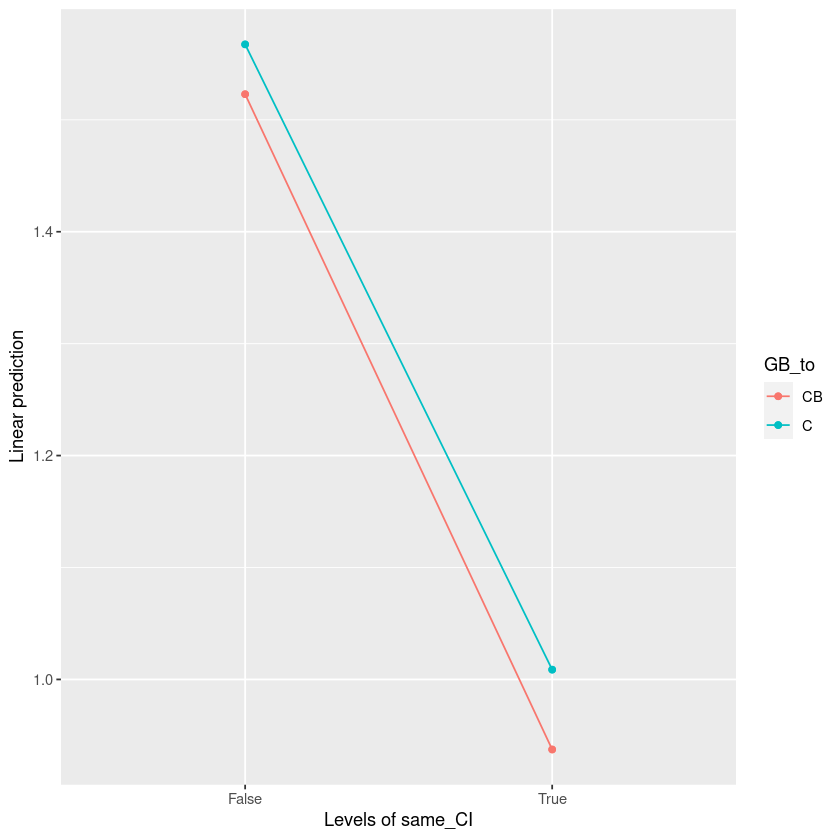

In [5]:
emmip(crossmodel, GB_to ~ same_CI)